# Online VMP of AR(p) (no measurement noise)
State space model
\begin{align*}
    &\mathbf{x}_t = \mathbf{A}\mathbf{x}_{t-1} + \mathbf{p}_t \quad \mathbf{p}_t \sim \mathcal{N}(\mathbf{0}, \mathbf{I}\gamma_t^{-1}) \\
    &y_t = \mathbf{c}^\text{T}\mathbf{x}_t
\end{align*}

or

\begin{align*}
     &p(\mathbf{x}_t\,|\,\mathbf{x}_{t-1},\mathbf{a},\gamma) = \mathcal{N}\left(\mathbf{x}_t \;\middle|\; \mathbf{A}\mathbf{x}_{t-1}, \mathbf{I}\gamma^{-1} \right)\\
    &p(y_t\,|\,\mathbf{x}_{t}) = \mathcal{N}\left(y_t \;\middle|\;\mathbf{c}^\text{T}\mathbf{x}_t, \epsilon \right)
\end{align*}

where

\begin{align*}
    &\mathbf{x}_t = (x_t, x_{t-1}, \dots, x_{t-p+1})^\text{T} \quad \mathbf{x}_{t-1} = (x_{t-1}, x_{t-2}, \dots, x_{t-p})^\text{T} 
    \\ \\
    &\mathbf{A} = 
    \begin{bmatrix}
        a_1 & a_2 & a_3 & \dots & a_p \\
        1 & 0 & 0 & \dots & 0 \\ 
        0 & 1 & 0 & \dots & 0 \\   
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \dots & 0
    \end{bmatrix}
    =
    \begin{bmatrix}
         \mathbf{a}^\text{T} \\
         \mathbf{I}_{p-1} \quad \mathbf{0}
    \end{bmatrix}
    \\ \\
    &\mathbf{I} = \mathbf{I}_p = 
    \begin{bmatrix}
        1 & 0 & 0 & \dots & 0 \\ 
        0 & 1 & 0 & \dots & 0 \\   
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \dots & 1
    \end{bmatrix} \\
    &\epsilon = 1\text{e}-12
\end{align*}

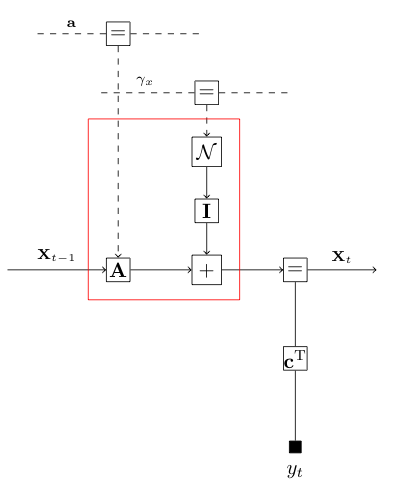

In [1]:
using Images
img = load("../ffgs/AR-online.png")

We are interested in an estimation of the AR coefficients $\mathbf{a}$, while setting process noise precision $\gamma=1$.

In [1]:
using ProgressMeter
using Revise
using ForneyLab
include( "../AR-node/autoregression.jl")
include("../AR-node/rules_prototypes.jl")
include("../AR-node/vmp_rules.jl")
# helpers for evaluation of the model
include("../helpers/functions.jl")
# module to generate data for AR
include("../data/ARdata.jl")
import Main.ARdata: use_data, generate_data, generate_sin, predict
import LinearAlgebra.I, LinearAlgebra.Symmetric
import ForneyLab: unsafeCov, unsafeMean, unsafePrecision

In [43]:
ARorder = 2 # order of AR model
diagAR(dim) = Matrix{Float64}(I, dim, dim)
x = []
# AR data
a_0 = 0.001; b_0 = 0.001
pn_var = a_0/b_0
coefs, x = generate_data(1000, ARorder, 1, noise_variance=pn_var)
#coefs, x = generate_sin(1000, pn_var)
# Observations
y = [xi[1] for xi in x[ARorder:end]]

999-element Array{Float64,1}:
  1.2846254264841013 
 -0.10789827086074126
 -1.101080099759903  
 -0.6326797500167187 
  0.5085660163321308 
 -2.2061480511026303 
 -0.6150135379578683 
  1.650902949165786  
 -0.27631239636099836
 -1.6993932317060545 
  0.05081692548597183
  2.0749088809246827 
 -0.8660783608961773 
  ⋮                  
  2.5528884392919533 
 -4.777578969152925  
 -1.6452916890828775 
  3.967484622060193  
  0.657495307990249  
 -4.749716878539441  
 -1.515905519415597  
  4.743130123520745  
  1.4812291028658928 
 -3.6354850439078454 
 -0.336534243725321  
  4.344908486489976  

In [44]:
g = FactorGraph()

# declare priors as random variables
@RV m_x_t_prev
@RV w_x_t_prev
@RV m_a_t
@RV w_a_t
@RV m_y_t
@RV a_w_t
@RV b_w_t

@RV a ~ GaussianMeanPrecision(m_a_t, w_a_t)
@RV x_t_prev ~ GaussianMeanPrecision(m_x_t_prev, w_x_t_prev)
@RV w ~ Gamma(a_w_t, b_w_t)
@RV x_t = AR(a, x_t_prev, w)
c = zeros(ARorder); c[1] = 1.0
@RV y_t ~ GaussianMeanPrecision(m_y_t, huge)
DotProduct(y_t, c, x_t)

# Placeholders for prior
placeholder(m_a_t, :m_a_t, dims=(ARorder,))
placeholder(w_a_t, :w_a_t, dims=(ARorder, ARorder))
placeholder(m_x_t_prev, :m_x_t_prev, dims=(ARorder,))
placeholder(w_x_t_prev, :w_x_t_prev, dims=(ARorder, ARorder))
placeholder(a_w_t, :a_w_t)
placeholder(b_w_t, :b_w_t)

# Placeholder for data
placeholder(m_y_t, :m_y_t)

ForneyLab.draw(g)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 13036461443228683011 -->
 
 13036461443228683011 
 
 placeholder_w_x_t_prev 
 
<!-- 14297972215728002957 -->
 
 14297972215728002957 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 13036461443228683011--14297972215728002957 -->
 
 13036461443228683011--14297972215728002957 
 
 w_x_t_prev 
 3 w 
 1 out 
 
<!-- 10642751313358222407 -->
 
 10642751313358222407 
 
 clamp_1 
 
<!-- 8575849284601041348 -->
 
 8575849284601041348 
 
 𝒩 
 gaussianmeanprecision_3 
 
<!-- 8575849284601041348--10642751313358222407 -->
 
 8575849284601041348--10642751313358222407 
 
 clamp_1 
 1 out 
 3 w 
 
<!-- 3348035344541368056 -->
 
 3348035344541368056 
 
 placeholder_w_a_t 
 
<!-- 9882937438318198228 -->
 
 9882937438318198228 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 3348035344541368056--9882937438318198228 -->
 
 3348035344541368056--9882937438318198228 
 
 w_a_t 
 3 w 
 1 out 
 
<!-- 8050559193324530756 -->
 
 8050559193324530756 
 
 dot 
 dotproduct_1 
 
<!-- 8050559193324530756--8575849284601041348 -->
 
 8050559193324530756--8575849284601041348 
 
 y_t 
 1 out 
 1 out 
 
<!-- 7587122781532187068 -->
 
 7587122781532187068 
 
 clamp_2 
 
<!-- 8050559193324530756--7587122781532187068 -->
 
 8050559193324530756--7587122781532187068 
 
 clamp_2 
 1 out 
 2 in1 
 
<!-- 12214988328322215803 -->
 
 12214988328322215803 
 
 Autoregression 
 autoregression_1 
 
<!-- 8050559193324530756--12214988328322215803 -->
 
 8050559193324530756--12214988328322215803 
 
 x_t 
 1 out 
 3 in2 
 
<!-- 7012787230318998504 -->
 
 7012787230318998504 
 
 placeholder_m_a_t 
 
<!-- 7012787230318998504--9882937438318198228 -->
 
 7012787230318998504--9882937438318198228 
 
 m_a_t 
 2 m 
 1 out 
 
<!-- 16825954894625544753 -->
 
 16825954894625544753 
 
 placeholder_m_x_t_prev 
 
<!-- 16825954894625544753--14297972215728002957 -->
 
 16825954894625544753--14297972215728002957 
 
 m_x_t_prev 
 2 m 
 1 out 
 
<!-- 4606541591991952863 -->
 
 4606541591991952863 
 
 placeholder_a_w_t 
 
<!-- 3453174451783309828 -->
 
 3453174451783309828 
 
 Gam 
 gamma_1 
 
<!-- 4606541591991952863--3453174451783309828 -->
 
 4606541591991952863--3453174451783309828 
 
 a_w_t 
 2 a 
 1 out 
 
<!-- 8049952943657514537 -->
 
 8049952943657514537 
 
 placeholder_b_w_t 
 
<!-- 8049952943657514537--3453174451783309828 -->
 
 8049952943657514537--3453174451783309828 
 
 b_w_t 
 3 b 
 1 out 
 
<!-- 12214988328322215803--14297972215728002957 -->
 
 12214988328322215803--14297972215728002957 
 
 x_t_prev 
 1 out 
 2 x 
 
<!-- 12214988328322215803--3453174451783309828 -->
 
 12214988328322215803--3453174451783309828 
 
 w 
 1 out 
 4 W 
 
<!-- 12214988328322215803--9882937438318198228 -->
 
 12214988328322215803--9882937438318198228 
 
 a 
 1 out 
 3 a 
 
<!-- 8421178290904951826 -->
 
 8421178290904951826 
 
 placeholder_m_y_t 
 
<!-- 8421178290904951826--8575849284601041348 -->
 
 8421178290904951826--8575849284601041348 
 
 m_y_t 
 2 m 
 1 out

In [45]:
# Specify recognition factorization
q = RecognitionFactorization(a, x_t, w, ids=[:A :X_t :W])

# Generate the variational update algorithms for each recognition factor
algo = variationalAlgorithm(q)

# Load algorithms
eval(Meta.parse(algo))

stepX_t! (generic function with 3 methods)

In [55]:
# Define values for prior statistics
m_a_0 = zeros(ARorder)
w_a_0 = 0.001*diagAR(ARorder)
m_x_prev_0 = ones(ARorder)
w_x_prev_0 = diagAR(ARorder)
a_w_0 = 3e3
b_w_0 = 1e3

# Storage for predictions
means = []
vars = []

# Storage for MSE of test set
MSEs = []
upto = ARorder
# we exclude last p (ARorder) samples for model evaluation purposes
n_samples = length(y) - upto 

# Storage
m_x_prev = Vector{Vector{Float64}}(undef, n_samples)
w_x_prev = Vector{Array{Float64, 2}}(undef, n_samples)
m_a = Vector{Vector{Float64}}(undef, n_samples)
w_a = Vector{Array{Float64, 2}}(undef, n_samples)
a_w = Vector{Float64}(undef, n_samples)
b_w = Vector{Float64}(undef, n_samples)

# Inits
m_x_t_prev_min = m_x_prev_0
w_x_t_prev_min = w_x_prev_0
m_a_t_min = m_a_0
w_a_t_min = w_a_0
a_w_t_min = a_w_0
b_w_t_min = b_w_0;

In [56]:
marginals = Dict()
# VMP iterations
n_its = 10

# making first dummy predictions
push!(means, m_a_t_min'm_x_t_prev_min)
push!(vars, a_w_t_min/b_w_t_min)

p = Progress(length(y), 1, "Observed ")
window = 5

for t in 1:n_samples
    predictions = predict(m_a_t_min, m_x_t_prev_min, 2)
    push!(MSEs, mse(predictions, y[t:t+upto-1]))
    update!(p, t)
    marginals[:a] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=m_a_t_min, w=w_a_t_min)
    marginals[:x_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=m_x_t_prev_min, w=w_x_t_prev_min)
    marginals[:w] = ProbabilityDistribution(Univariate, Gamma, a=a_w_t_min, b=b_w_t_min)
    global m_x_t_prev_min, w_x_t_prev_min, m_a_t_min, w_a_t_min, a_w_t_min, b_w_t_min
    for i = 1:n_its
        data = Dict(:m_y_t => y[t],
                    :m_a_t => m_a_t_min,
                    :w_a_t => w_a_t_min,
                    :m_x_t_prev => m_x_t_prev_min,
                    :w_x_t_prev => w_x_t_prev_min,
                    :a_w_t => a_w_t_min,
                    :b_w_t => b_w_t_min)
        stepX_t!(data, marginals)
        stepA!(data, marginals)
        stepW!(data, marginals)
        m_a[t] = unsafeMean(marginals[:a])
        w_a[t] = unsafePrecision(marginals[:a])
        m_x_prev[t] = unsafeMean(marginals[:x_t])
        w_x_prev[t] = unsafePrecision(marginals[:x_t])
        a_w[t] = marginals[:w].params[:a]
        b_w[t] = marginals[:w].params[:b]
        m_a_t_min = m_a[t]
        w_a_t_min = w_a[t]
        m_x_t_prev_min = m_x_prev[t]
        w_x_t_prev_min = w_x_prev[t]
        a_w_t_min = a_w[t]
        b_w_t_min = b_w[t]
    end
    m = m_a_t_min'm_x_t_prev_min
    v = mean(marginals[:w])
    push!(means, m)
    push!(vars, v)
end

Observed  85%|███████████████████████████████████▊      |  ETA: 0:00:00

In [62]:
println("Coefs")
println("real = ", coefs)
println("estimated mean = ", unsafeMean(marginals[:a]))
println("===============")
println("Noise")
println("real variance = ", pn_var)
println("estimated variance = ", unsafeMean(marginals[:w]))

Coefs
real = [-0.176894, -0.96718]
estimated mean = [-0.175291, -0.906781]
Noise
real variance = 1.0
estimated variance = 0.999520294412592


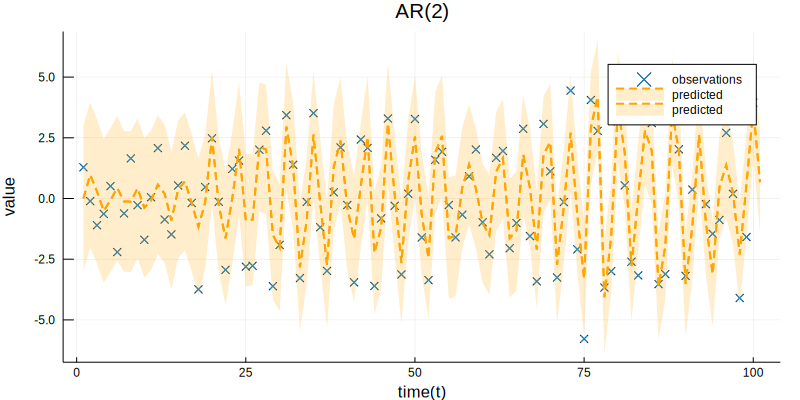

In [50]:
using Plots

from = 1
upto = 100
scale = 1.0


scatter(collect(from:upto), y[from:upto], label="observations", title="AR($ARorder)", size=(800, 400), 
        markershape = :xcross, markeralpha = 0.9, markersize = 3)
pAR1 = plot!(collect(from:upto+1), [means[from:upto+1], means[from:upto+1]], fillrange=[means[from:upto+1] -
          scale .* vars[from:upto+1], means[from:upto+1] + scale .* vars[from:upto+1]],
          linestyle=:dash, linewidth = 2,
          color=:orange,
          fillalpha = 0.2,
          fillcolor = :orange,
          label="predicted", xlabel="time(t)", ylabel="value",
          legend=true)

In [129]:
# Amimation
# Plotting predictions
toshow = 10 # number of points to plot at once (length(predictions) - length(y) = 1)
scale = 1.0 # scale for the variance

anim = @animate for i in 1:length(means)-toshow-1
    s = plot(xticks = i:div(toshow, 2):i+toshow);
    ylims!(minimum(y) - .1, maximum(y) + .1);
    plot!(collect(i:i+toshow), y[i:i+toshow], xlabel="observation", ylabel="value", label="actual", color=:blue)
    plot!(collect(i:i+toshow+1), [means[i:i+toshow+1], means[i:i+toshow+1]], fillrange=[means[i:i+toshow+1] -
          scale .* vars[i:i+toshow+1], means[i:i+toshow+1] + scale .* vars[i:i+toshow+1]],
          linestyle=:dash, linewidth = 2,
          color=:orange,
          fillalpha = 0.2,
          fillcolor = :orange,
          label="predicted")
end;

In [130]:
gif(anim, "../gifs/predictions.gif", fps = 5)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/VariationalBayes/gifs/predictions.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/gylTh/src/animation.jl:90


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/VariationalBayes/gifs/predictions.gif")

In [121]:
# Plotting MSE
anim = @animate for i in 1:length(MSEs)
    s = plot()
    ylims!(minimum(MSEs) - 1, maximum(MSEs) + 1)
    xlims!(1, length(MSEs))
    plot!(collect(1:i), MSEs[1:i], xlabel="observation", ylabel="MSE", label="")
end;

In [122]:
gif(anim, "../gifs/MSE_evo.gif", fps = 100)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/VariationalBayes/gifs/MSE_evo.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/gylTh/src/animation.jl:90


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/VariationalBayes/gifs/MSE_evo.gif")

In [147]:
# Plotting AR coefs
# !!! ONLY FOR AR(2)
using LinearAlgebra; 

len = 64

# Definition of the bivariate gaussian using a covariance matrix
𝓝(x, μ, Σ) = 1/((2 * π)^(length(μ)/2) * det(Σ)^(1/2)) * exp(-(1/2) * (x-μ)' * Σ^(-1) * (x-μ));

insert!(m_a, 1, m_a_0)
insert!(w_a, 1, 0.1*diagAR(ARorder))
anim = @animate for i in 1:1:length(m_a)
    if !isassigned(m_a, i)
        continue
    end
    s = plot();
    xlims!(-0.1, 1.3)
    ylims!(-1.2, 0.2)
    plot!([m_a_0[1]],[m_a_0[2]], seriestype=:scatter, title = "AR coefs", label="prior")
    plot!([coefs[1]],[coefs[2]], seriestype=:scatter, label="true")
    plot!([m_a[i][1]],[m_a[i][2]], seriestype=:scatter, label="posterior")
    
    # Posterior
    # get the maximum σ (used to construct the x and y ranges)
    σ_max = sqrt((w_a[i][1]^-1 > w_a[i][4]^-1 ) ? w_a[i][1]^-1 : w_a[i][4]^-1)
    rx = range(m_a[i][1]-3*σ_max, m_a[i][1]+3*σ_max, length=len)
    ry = range(m_a[i][2]-3*σ_max, m_a[i][2]+3*σ_max, length=len)
    contour!(rx, ry, (x1, x2) -> 𝓝([x1 ; x2], m_a[i], w_a[i]^-1), xlabel="a1", ylabel="a2")
end;

In [148]:
gif(anim, "../gifs/kpcoefs_evo.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/VariationalBayes/gifs/kpcoefs_evo.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/gylTh/src/animation.jl:90


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/VariationalBayes/gifs/kpcoefs_evo.gif")

# Random walk model 
As a benchamrk, we use the following RW model.
\begin{align*}
    &x_t = x_{t-1} + p_t \quad p_t \sim \mathcal{N}(0, \gamma_x^{-1}) \\
\end{align*}

We set $\gamma_y = 1.0$

In [149]:
function rwp_predict(x, pn_var, upto)
    predictions = []
    for i in 1:upto
        x̂ = x + sqrt(pn_var)*randn()
        push!(predictions, x̂)
        x = x
    end
    return predictions
end

pn_var = 10.0
rw = y[1:n_samples] #.+ sqrt(pn_var)*randn()

MSEs_rw = []
upto = ARorder
for t in 1:n_samples
    predictions = rwp_predict(rw[t], 1.0, upto)
    push!(MSEs_rw, mse(predictions, y[t:t+upto-1]))
end

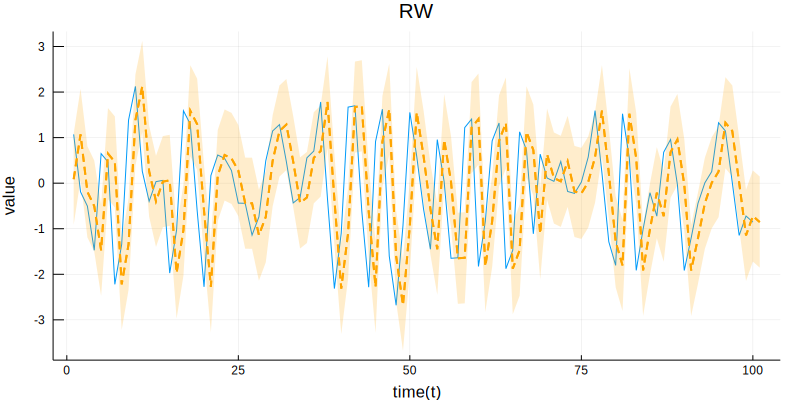

In [150]:
using Plots

from = 1
upto = 100
var_rw = 1.0
plot(y[from + 1:upto + 1], xlabel="time(t)", ylabel="value", label="actual", title="RW", size=(800, 400))

pRW = plot!(collect(from:upto+1), [rw[from:upto+1], rw[from:upto+1]], fillrange=[rw[from:upto+1] .-
            var_rw, rw[from:upto+1] .+ var_rw],
            linestyle=:dash, linewidth = 2,
            color=:orange,
            fillalpha = 0.2,
            fillcolor = :orange,
            label="predicted",
            legend=false)

# Comparison

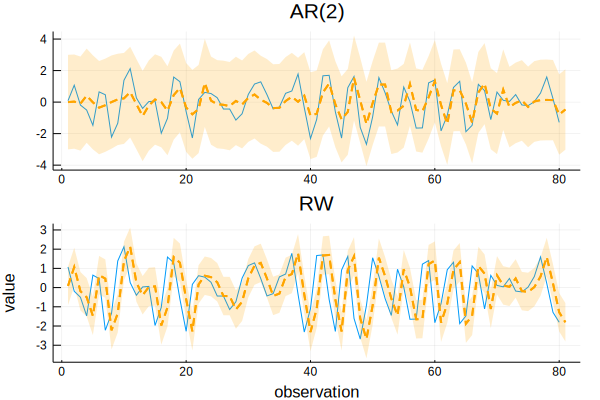

In [151]:
using Plots

from = 1
upto = 80
var_rw = 1.0
plot(y[from + 1:upto + 1], xlabel="observation", ylabel="value", label="actual", title="RW")
pRW = plot!(collect(from:upto+1), [rw[from:upto+1], rw[from:upto+1]], fillrange=[rw[from:upto+1] .-
            var_rw, rw[from:upto+1] .+ var_rw],
            linestyle=:dash, linewidth = 2,
            color=:orange,
            fillalpha = 0.2,
            fillcolor = :orange,
            label="predicted")

plot(y[from:upto], label="actual", title="AR($ARorder)")
#pAR = plot!(means[from:upto], label="predicted")
pAR = plot!(collect(from:upto+1), [means[from:upto+1], means[from:upto+1]], fillrange=[means[from:upto+1] -
          scale .* vars[from:upto+1], means[from:upto+1] + scale .* vars[from:upto+1]],
          linestyle=:dash, linewidth = 2,
          color=:orange,
          fillalpha = 0.2,
          fillcolor = :orange,
          label="predicted")
plot(pAR, pRW, layout=(2,1), legend=false)

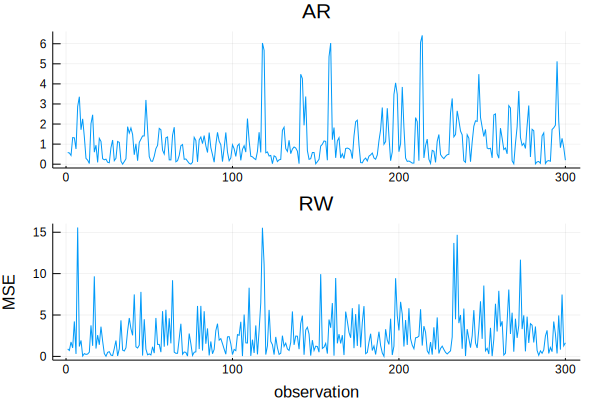

In [152]:
from = 1
upto = 300
pRW = plot(MSEs_rw[from:upto], xlabel="observation", ylabel="MSE", label="", title="RW")
pAR = plot(MSEs[from:upto], label="",  title="AR")
plot(pAR, pRW, layout=(2,1))

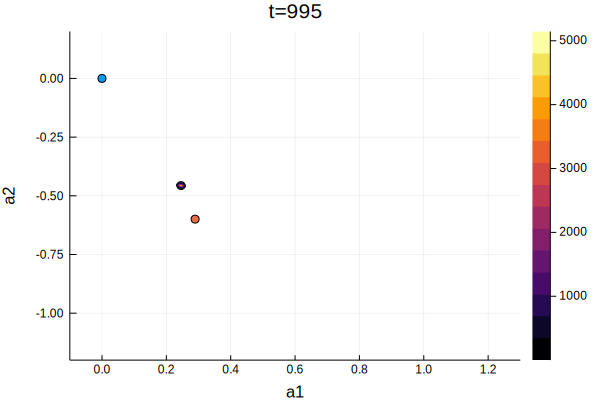

In [156]:
using LinearAlgebra; 

i=995

len = 64

# Definition of the bivariate gaussian using a covariance matrix
𝓝(x, μ, Σ) = 1/((2 * π)^(length(μ)/2) * det(Σ)^(1/2)) * exp(-(1/2) * (x-μ)' * Σ^(-1) * (x-μ));
s = plot();
xlims!(-0.1, 1.3)
ylims!(-1.2, 0.2)
plot!([m_a_0[1]],[m_a_0[2]], seriestype=:scatter, title = "t=$i", label="prior")
plot!([coefs[1]],[coefs[2]], seriestype=:scatter, label="true")
plot!([m_a[i][1]],[m_a[i][2]], seriestype=:scatter, label="posterior")

# Posterior
# get the maximum σ (used to construct the x and y ranges)
σ_max = sqrt((w_a[i][1]^-1 > w_a[i][4]^-1 ) ? w_a[i][1]^-1 : w_a[i][4]^-1)
rx = range(m_a[i][1]-3*σ_max, m_a[i][1]+3*σ_max, length=len)
ry = range(m_a[i][2]-3*σ_max, m_a[i][2]+3*σ_max, length=len)
contour!(rx, ry, (x1, x2) -> 𝓝([x1 ; x2], m_a[i], w_a[i]^-1), xlabel="a1", ylabel="a2", legend=:false)